<a href="https://colab.research.google.com/github/whiteydoublee/Colab/blob/main/Ch3.%EB%94%A5%EB%9F%AC%EB%8B%9D/5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""
날짜: 2021/10/27
이름: 김예은
내용: 텐서플로 MNIST 실습하기
"""
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [4]:
#데이터불러오기
#(mnist_train_data, mnist_train_label),(mnist_test_data, mnist_test_label) = load_data()
#mnist_train_data.shape
df_mnist_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_train.csv')
df_mnist_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_test.csv')

mnist_train_data = df_mnist_train.iloc[:,1:]/255
mnist_train_label = df_mnist_train.iloc[:,0]

mnist_test_data = df_mnist_test.iloc[:,1:]/255
mnist_test_label = df_mnist_test.iloc[:,0]


[44649 37547 13178 29761 10128]


TypeError: ignored

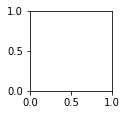

In [44]:
# 샘플 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx) 
plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number : %d' % label)
  plt.axis('off')

In [5]:
#  라벨 원-핫 코드 변환
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label = to_categorical(mnist_test_label)
mnist_train_label[1] 

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
# 모델 설계
model = Sequential()
model.add(Dense(units=784, input_dim=784, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [7]:
#모델 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [8]:
#학습하기
model.fit(mnist_train_data, mnist_train_label, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3344 - acc: 0.9036
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1680 - acc: 0.9504
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1061 - acc: 0.9684
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0733 - acc: 0.9780
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - acc: 0.9838
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0385 - acc: 0.9883
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - acc: 0.9918
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - acc: 0.9944
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - acc: 0.9962
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0113 - acc: 0.9970
Epoch 11/100
1875/1

In [9]:
#평가하기
result = model.evaluate(mnist_test_data, mnist_test_label)
result

313/313 [==============================] - 1s 3ms/step - loss: 0.1181 - acc: 0.9849


[0.11813851445913315, 0.9848999977111816]

In [10]:
#테스트하기
img1=Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num1.jpg')
img2=Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num2.jpg')
img3=Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num3.jpg')
img4=Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num4.jpg')
img5=Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num5.jpg')

In [11]:
#이미지 픽셀 데이터 변환
img1_px = np.array(img1) 
img2_px = np.array(img2) 
img3_px = np.array(img3) 
img4_px = np.array(img4) 
img5_px = np.array(img5) 

img1_px_reshaped = np.reshape(img1_px, (1,784))
img2_px_reshaped = np.reshape(img2_px, (1,784))
img3_px_reshaped = np.reshape(img3_px, (1,784))
img4_px_reshaped = np.reshape(img4_px, (1,784))
img5_px_reshaped = np.reshape(img5_px, (1,784))

img_arr = np.array([img1_px_reshaped, img2_px_reshaped, img3_px_reshaped, img4_px_reshaped, img5_px_reshaped])
img_arr / 255

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [13]:
# 새로운 이미지 테스트하기
#result = model.prideict(img1_px)
result

[0.11813851445913315, 0.9848999977111816]